**Library**

In [10]:
import yfinance as yf   #Stock market library

Data **Collection**

In [11]:
usd_inr = yf.download('USDINR=X', start = '2024-01-01', end='2024-12-31', interval='1wk')

/tmp/ipython-input-1043297468.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  usd_inr = yf.download('USDINR=X', start = '2024-01-01', end='2024-12-31', interval='1wk')
[*********************100%***********************]  1 of 1 completed


In [12]:
type(usd_inr)

pandas.core.frame.DataFrame

In [13]:
usd_inr.head()

Price,Close,High,Low,Open,Volume
Ticker,USDINR=X,USDINR=X,USDINR=X,USDINR=X,USDINR=X
Date,,,,,
2024-01-01,83.240601,83.360298,83.035004,83.248596,0
2024-01-08,83.076103,83.189697,82.779099,83.191101,0
2024-01-15,83.160599,83.230797,82.809998,82.872101,0
2024-01-22,83.146103,83.222504,81.513702,83.124702,0
2024-01-29,82.927597,83.212601,82.815002,83.121300,0


In [14]:
usd_inr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2024-01-01 to 2024-12-30
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, USDINR=X)   53 non-null     float64
 1   (High, USDINR=X)    53 non-null     float64
 2   (Low, USDINR=X)     53 non-null     float64
 3   (Open, USDINR=X)    53 non-null     float64
 4   (Volume, USDINR=X)  53 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.5 KB


In [15]:
usd_inr.reset_index(inplace=True)

Data **Anaysis**

In [16]:
#Keep only relevent Columns
usd_inr = usd_inr[['Date', 'Close']]
usd_inr.columns = ['Date', 'USD_INR']

In [17]:
usd_inr.head()

,Date,USD_INR
0,2024-01-01,83.240601
1,2024-01-08,83.076103
2,2024-01-15,83.160599
3,2024-01-22,83.146103
4,2024-01-29,82.927597


In [18]:
gold_data_inr = yf.download('XAU',start='2024-01-01',end='2024-12-31',interval='1wk')

/tmp/ipython-input-418192754.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_data_inr = yf.download('XAU',start='2024-01-01',end='2024-12-31',interval='1wk')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XAU']: YFPricesMissingError('possibly delisted; no price data found  (1wk 2024-01-01 -> 2024-12-31)')


In [19]:
import pandas as pd
gold_dataset=pd.read_csv("/content/Gold vs USDINR.csv")

In [20]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      53 non-null     object 
 1   USD_INR   53 non-null     float64
 2   Goldrate  53 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.4+ KB


In [21]:
gold_dataset.head()

,Date,USD_INR,Goldrate
0,2024-01-01,83.240601,"₹5,066.31"
1,2024-01-08,83.076103,"₹4,966.31"
2,2024-01-15,83.160599,"₹5,015.33"
3,2024-01-22,83.146103,"₹4,950.84"
4,2024-01-29,82.927597,"₹4,976.77"


In [22]:
gold_dataset['Goldrate']=gold_dataset['Goldrate'].replace('₹','',regex=True).replace(',','',regex=True).astype(float)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='USD_INR'>

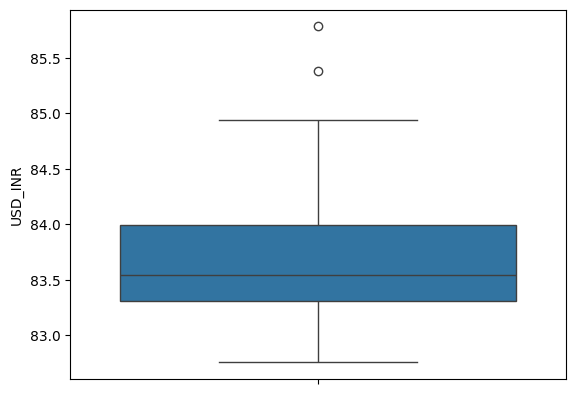

In [24]:
sns.boxplot(gold_dataset['USD_INR'])

In [25]:
gold_dataset['USD_INR'].max()

85.78659821

**EDA**

-Handle Missing Values - No

-Handle Imbalanced dataset - No

-Handle outliers - seen

-Encode categorical features - No

--Normalization vs Standardization - Standardize


<Axes: xlabel='USD_INR', ylabel='Goldrate'>

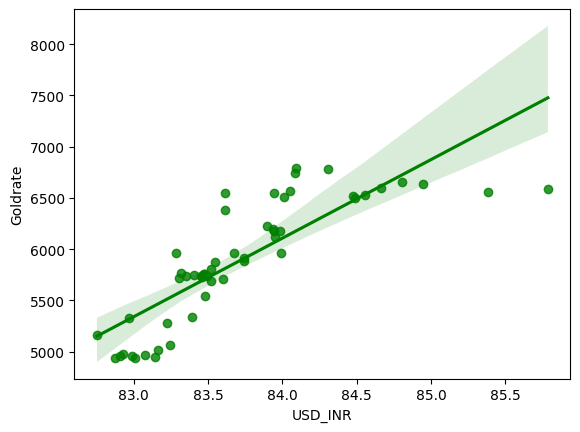

In [26]:
sns.regplot(x='USD_INR',y='Goldrate',data=gold_dataset,color='Green')

**Model Training**

In [27]:
x=gold_dataset[['USD_INR']]
y=gold_dataset[['Goldrate']]

In [28]:
x

,USD_INR
0,83.240601
1,83.076103
2,83.160599
3,83.146103
4,82.927597
5,82.985298
6,83.009598
7,82.872299
8,82.910400
9,82.752296


In [29]:
y

,Goldrate
0,5066.31
1,4966.31
2,5015.33
3,4950.84
4,4976.77
5,4953.90
6,4938.73
7,4934.99
8,4960.54
9,5167.64


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [31]:
X_train.shape,X_test.shape

((47, 1), (6, 1))

In [32]:
Y_test.shape,Y_train.shape

((6, 1), (47, 1))

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [34]:
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

In [35]:
Y_train

,Goldrate
17,5744.34
50,6639.21
3,4950.84
32,6114.39
13,5543.85
8,4960.54
26,5734.29
6,4938.73
34,6222.57
4,4976.77


In [36]:
X_train_Scaled

array([[-0.4753469 ],
       [ 1.91603897],
       [-0.87974106],
       [ 0.36700952],
       [-0.36423189],
       [-1.24606136],
       [-0.33998365],
       [-1.09189238],
       [ 0.28432837],
       [-1.21933493],
       [-0.15146399],
       [-0.17182302],
       [ 0.92354506],
       [ 0.35503362],
       [ 1.69379708],
       [-0.25979254],
       [-1.49178076],
       [-0.63775672],
       [ 0.04932799],
       [ 0.34602205],
       [-0.40604082],
       [-0.7546344 ],
       [-0.7328762 ],
       [ 1.20624748],
       [-0.30097304],
       [ 0.43025651],
       [ 0.461963  ],
       [ 0.05011057],
       [ 1.18371856],
       [-0.98853205],
       [-0.60807784],
       [-0.85721215],
       [ 0.36342862],
       [ 0.42186152],
       [-0.29537637],
       [ 1.48242836],
       [-1.16027359],
       [-0.371536  ],
       [-0.39283176],
       [ 3.22402082],
       [-0.66169667],
       [-1.30527686],
       [ 0.57448905],
       [-0.56394486],
       [-0.05883454],
       [ 2

In [37]:
X_test_Scaled

array([[-0.37619593],
       [ 0.53097266],
       [ 1.31302272],
       [-0.49602609],
       [ 0.58955971],
       [-1.12965796]])

In [38]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [39]:
model.fit(X_train_Scaled,Y_train)

LinearRegression()

In [40]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [41]:
model.coef_

array([[469.20755762]])

In [42]:
model.intercept_

array([5878.57340426])

In [43]:
m=model.coef_[0][0] #slope
b=model.intercept_[0] #intercept

In [44]:
m,b

(np.float64(469.2075576153299), np.float64(5878.573404255313))

In [45]:
X_train_Predict = model.predict(X_train_Scaled)

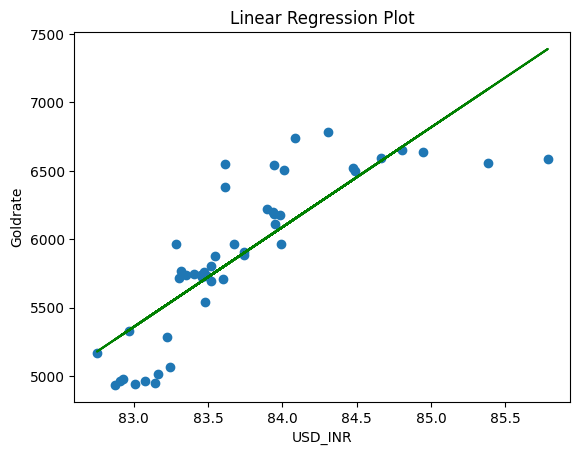

In [46]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,X_train_Predict,color='green')
plt.xlabel('USD_INR')
plt.ylabel('Goldrate')
plt.title('Linear Regression Plot')
plt.show()

In [47]:
X_test_Predict=model.predict(X_test_Scaled)

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
mean_squared_error(Y_test,X_test_Predict)

141948.22993388725

Hyperparameter Optimization

In [50]:
from sklearn.model_selection import RandomizedSearchCV
param_search = {'copy_X':[True,False],'fit_intercept':[True,False],'n_jobs':[1,5,10,15,None],'positive':[True,False]}

In [51]:
search=RandomizedSearchCV(model,param_search,n_iter=50,cv=5)

In [52]:
search.fit(X_train,Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=50,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 5, 10, 15, None],
                                        'positive': [True, False]})

In [53]:
search.best_params_

{'positive': True, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}

In [54]:
tuned_model=LinearRegression(positive=True,n_jobs=1,fit_intercept=True,copy_X=True)

In [55]:
tuned_model.fit(X_train_Scaled,Y_train)

LinearRegression(n_jobs=1, positive=True)

In [56]:
tuned_model.coef_

array([[469.20755762]])

In [57]:
tuned_model.intercept_

array([5878.57340426])

MLOPS

-Save Model

-Build Interface

-Connect Model and Interface

In [58]:
import pickle

In [59]:
pickle.dump(model,open('model.pickle','wb'))

In [60]:
model_reloaded=pickle.load(open('model.pickle','rb'))

In [61]:
model_reloaded.coef_

array([[469.20755762]])

In [62]:
pickle.dump(scaler,open('scaler.pkl','wb'))

In [65]:
import numpy as np

In [66]:
def calculate_gold_rate(usd_inr):
  scaled_value=scaler.transform(np.array(usd_inr).reshape(1,-1))
  return model.predict(scaled_value)[0][0].round(2)

In [67]:
calculate_gold_rate(80)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.float64(3171.57)

In [68]:
import gradio as gr                                         #gradio library is used to create simple web UI for python function


demo = gr.Interface(
    fn=calculate_gold_rate,
    inputs=["number"],
    outputs=["number"],
    title="Gold Rate Prediction"
)
demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e01deb2086801e049b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Stage 1 - Data Collection

Stage 2 - Data Anaysis